In [3]:
%matplotlib inline
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal


# Optional: Advanced EDA
from pandas_profiling import ProfileReport 

In [4]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")



## Data loading and check 

In [5]:
df = pd.read_csv("online_gaming_behavior_dataset.csv")
df.head()
## Basic info
df.info()

# Summary statistics (numeric columns only)
print('\n--- Summary statistics ---')
print(df.describe())

# Summary of all columns (including categorical)
print('\n--- Full summary (including categorical) ---')
print(df.describe(include='all'))

# Missing values
print('\n--- Missing values ---')
print(df.isnull().sum())

# Check column types
print('\n--- Column types ---')
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

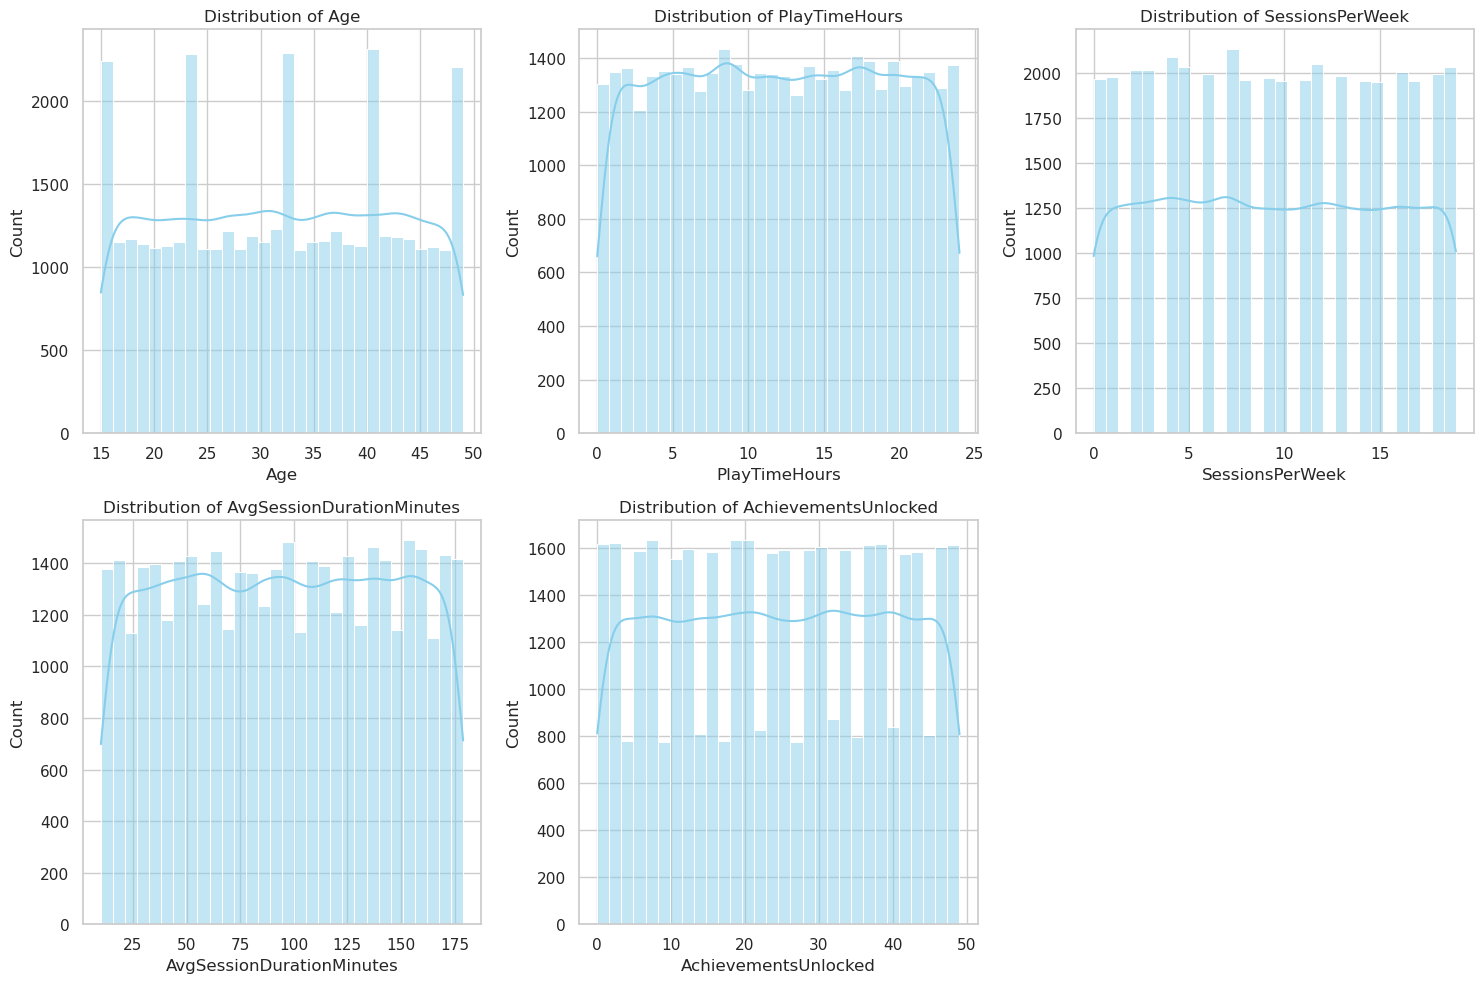

In [6]:
# Select numeric columns to plot
cols = ['Age', 'PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes', 'AchievementsUnlocked']

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through columns and plot each one
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns
    sns.histplot(data=df, x=col, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust spacing
plt.tight_layout()
plt.show()



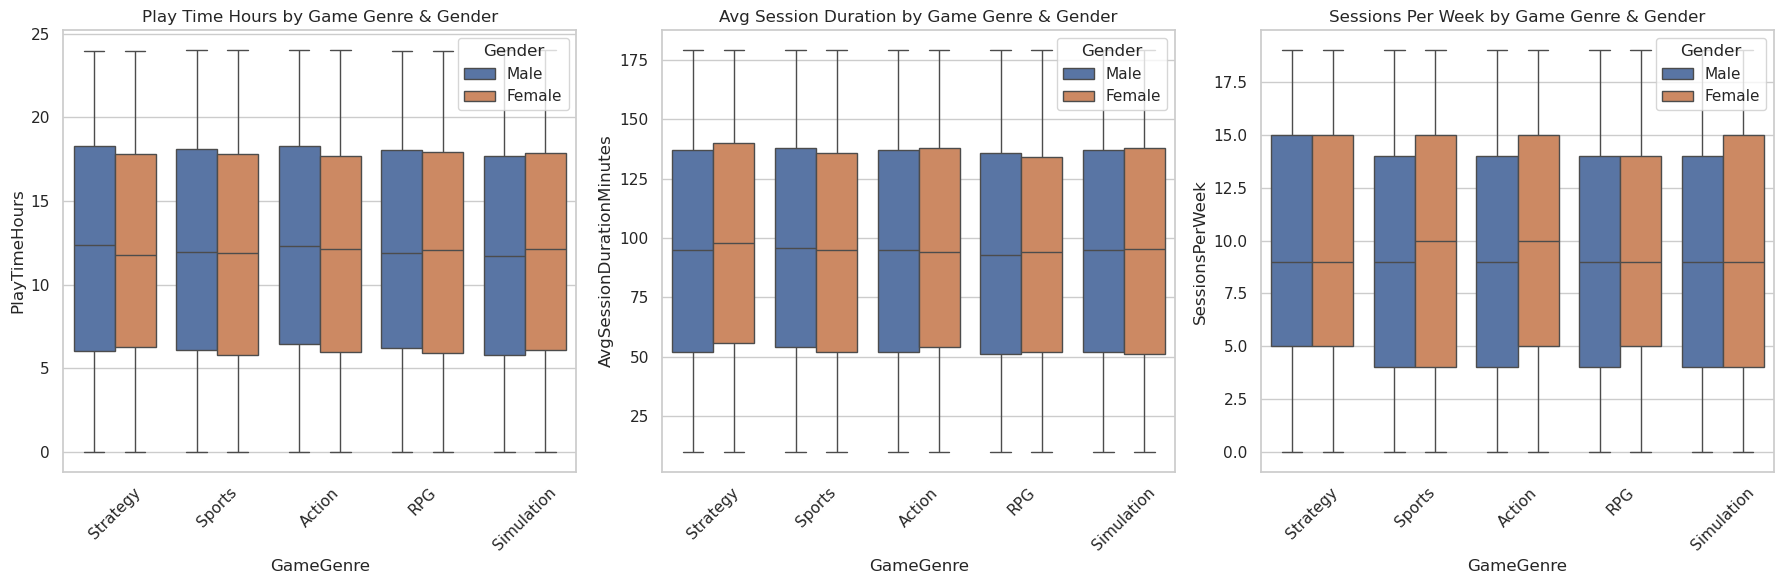

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Plot 1: PlayTimeHours
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='GameGenre', y='PlayTimeHours', hue='Gender')
plt.xticks(rotation=45)
plt.title('Play Time Hours by Game Genre & Gender')
plt.legend(title='Gender', loc='upper right')

# Plot 2: AvgSessionDurationMinutes
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='GameGenre', y='AvgSessionDurationMinutes', hue='Gender')
plt.xticks(rotation=45)
plt.title('Avg Session Duration by Game Genre & Gender')
plt.legend(title='Gender', loc='upper right')

# Plot 3: SessionsPerWeek
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='GameGenre', y='SessionsPerWeek', hue='Gender')
plt.xticks(rotation=45)
plt.title('Sessions Per Week by Game Genre & Gender')
plt.legend(title='Gender', loc='upper right')

plt.tight_layout()
plt.show()


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import numpy as np

def analyze_by_gender(df, variables, gender_col='Gender'):
    for var in variables:
        print(f"\n=== Analysis for '{var}' ===")
        
        # Drop NA values for this variable and gender
        data = df[[var, gender_col]].dropna()
        
        # Separate Male and Female groups
        male = data[data[gender_col] == 'Male'][var]
        female = data[data[gender_col] == 'Female'][var]
        
        # Plot distributions by gender
        plt.figure(figsize=(8, 4))
        sns.histplot(data=data, x=var, hue=gender_col, kde=True, stat='density', common_norm=False)
        plt.title(f'Distribution of {var} by {gender_col}')
        plt.show()
        
        # Normality test (Shapiro-Wilk) for both groups
        stat_m, p_m = shapiro(male.sample(min(len(male), 500)))  # limit size for speed if large
        stat_f, p_f = shapiro(female.sample(min(len(female), 500)))
        
        print(f"Shapiro-Wilk test p-values: Male = {p_m:.4f}, Female = {p_f:.4f}")
        
        # Decide test based on normality (p > 0.05 means data is likely normal)
        if p_m > 0.05 and p_f > 0.05:
            # Use t-test (Welch's)
            t_stat, p_val = ttest_ind(male, female, equal_var=False)
            test_name = 'Independent t-test (Welch’s)'
        else:
            # Use Mann-Whitney U test
            t_stat, p_val = mannwhitneyu(male, female, alternative='two-sided')
            test_name = 'Mann-Whitney U test'
        
        # Print results
        print(f"{test_name} results:")
        print(f"Statistic = {t_stat:.4f}, p-value = {p_val:.4f}")
        
        # Means or medians
        mean_m = male.mean()
        mean_f = female.mean()
        median_m = male.median()
        median_f = female.median()
        
        print(f"Male: mean={mean_m:.2f}, median={median_m:.2f}")
        print(f"Female: mean={mean_f:.2f}, median={median_f:.2f}")
        
        if p_val < 0.05:
            print(f"Result: Statistically significant difference between genders for '{var}' (p < 0.05)")
        else:
            print(f"Result: No statistically significant difference between genders for '{var}' (p >= 0.05)")




=== Analysis for 'PlayTimeHours' ===


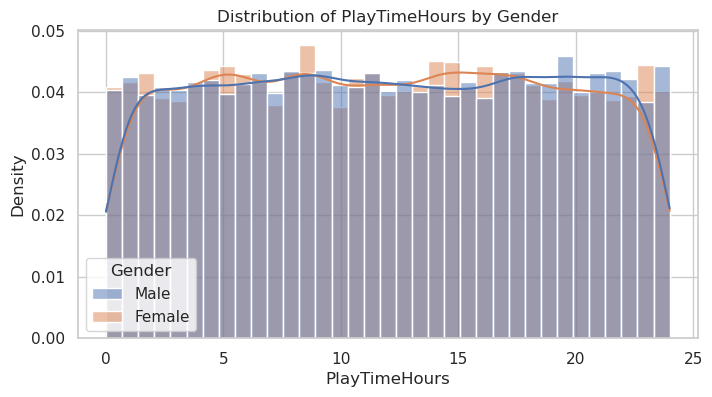

Shapiro-Wilk test p-values: Male = 0.0000, Female = 0.0000
Mann-Whitney U test results:
Statistic = 194055577.0000, p-value = 0.1901
Male: mean=12.06, median=12.03
Female: mean=11.97, median=11.98
Result: No statistically significant difference between genders for 'PlayTimeHours' (p >= 0.05)

=== Analysis for 'SessionsPerWeek' ===


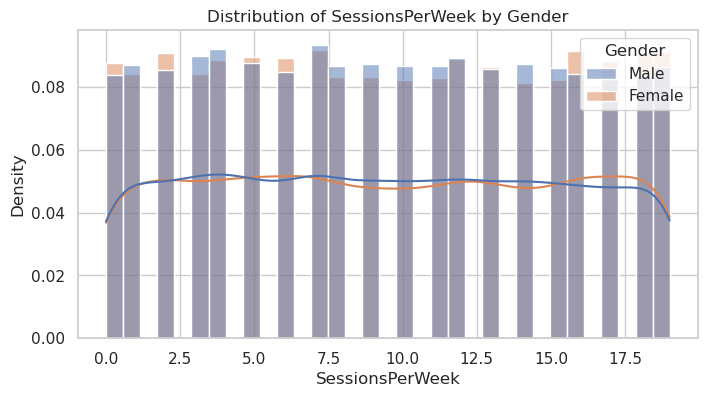

Shapiro-Wilk test p-values: Male = 0.0000, Female = 0.0000
Mann-Whitney U test results:
Statistic = 191117393.0000, p-value = 0.1993
Male: mean=9.44, median=9.00
Female: mean=9.52, median=9.00
Result: No statistically significant difference between genders for 'SessionsPerWeek' (p >= 0.05)

=== Analysis for 'AvgSessionDurationMinutes' ===


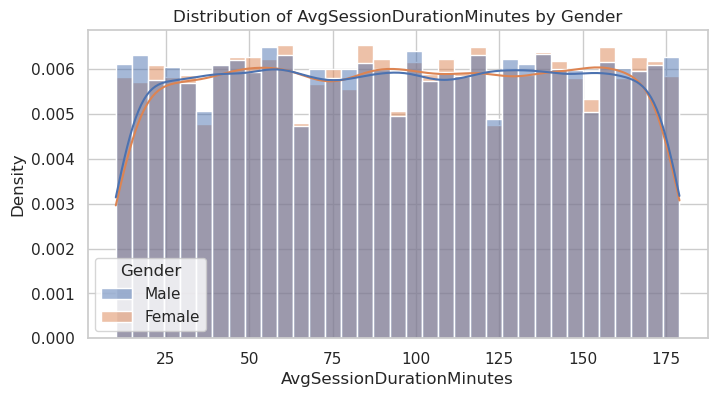

Shapiro-Wilk test p-values: Male = 0.0000, Female = 0.0000
Mann-Whitney U test results:
Statistic = 191852665.5000, p-value = 0.5266
Male: mean=94.66, median=95.00
Female: mean=94.98, median=95.00
Result: No statistically significant difference between genders for 'AvgSessionDurationMinutes' (p >= 0.05)


In [9]:
vars_to_test = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']
analyze_by_gender(df, vars_to_test)


# Gender Effect Analysis on Online Gaming Behavior

An analysis was conducted to determine whether gender influences key gaming behavior metrics, specifically **Play Time Hours**, **Sessions Per Week**, and **Average Session Duration in Minutes**. Due to the data’s non-normal distribution, as indicated by Shapiro-Wilk tests, the non-parametric **Mann-Whitney U test** was used to compare male and female players.

The results showed **no statistically significant differences** between genders for any of the variables tested. Mean playtime hours were very similar for males (12.06) and females (11.97), and the median values were nearly identical. Similarly, Sessions Per Week and Average Session Duration also exhibited close means and medians between genders, with p-values well above the 0.05 significance threshold (0.1993 and 0.5266 respectively).

These findings suggest that **gender does not have a meaningful impact** on these aspects of online gaming behavior within this dataset.


In [10]:
def analyze_by_age_groups(df, variables, age_col='Age', bins=[0, 20, 30, 40, 50]):
    # Create age groups
    df['AgeGroup'] = pd.cut(df[age_col], bins=bins, right=False)
    
    print(f"Age groups created: {df['AgeGroup'].unique()}\n")
    
    summary = []
    
    for var in variables:
        print(f"=== Analysis for '{var}' by AgeGroup ===")
        
        # Drop NA
        data = df[[var, 'AgeGroup']].dropna()
        
        # Plot
        plt.figure(figsize=(8,4))
        sns.boxplot(data=data, x='AgeGroup', y=var)
        plt.title(f"{var} distribution by Age Group")
        plt.xticks(rotation=45)
        plt.show()
        
        # Groups for test
        groups = [group[var].values for name, group in data.groupby('AgeGroup')]
        
        # Kruskal-Wallis test
        stat, p = kruskal(*groups)
        print(f"Kruskal-Wallis test statistic = {stat:.4f}, p-value = {p:.4f}")
        
        signif = "Yes" if p < 0.05 else "No"
        
        summary.append({
            "Variable": var,
            "Kruskal-Wallis Statistic": stat,
            "p-value": p,
            "Significant difference?": signif
        })
        
        print("\n")
    
    summary_df = pd.DataFrame(summary)
    return summary_df

Age groups created: [[40, 50), [20, 30), [30, 40), [0, 20)]
Categories (4, interval[int64, left]): [[0, 20) < [20, 30) < [30, 40) < [40, 50)]

=== Analysis for 'PlayTimeHours' by AgeGroup ===


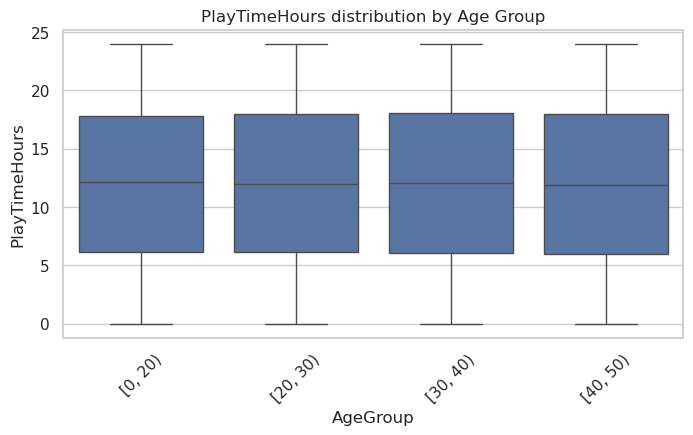

Kruskal-Wallis test statistic = 0.5979, p-value = 0.8969


=== Analysis for 'SessionsPerWeek' by AgeGroup ===


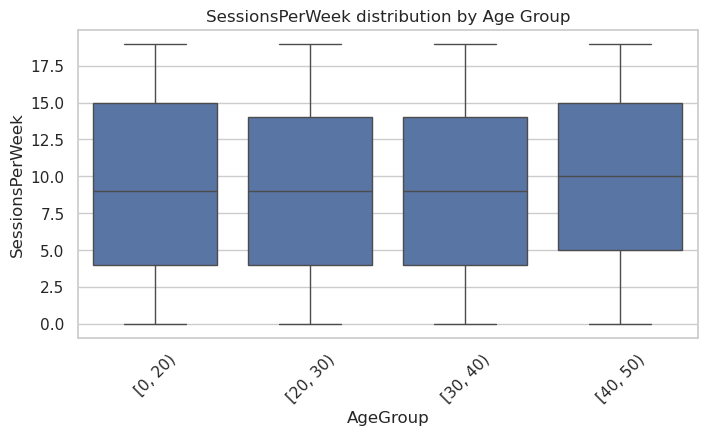

Kruskal-Wallis test statistic = 2.4100, p-value = 0.4918


=== Analysis for 'AvgSessionDurationMinutes' by AgeGroup ===


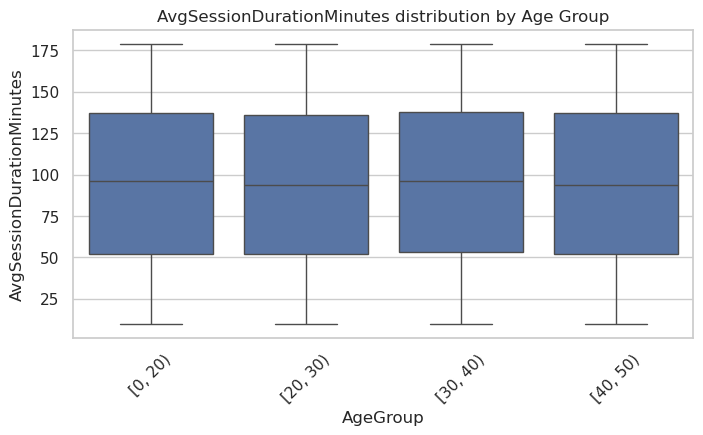

Kruskal-Wallis test statistic = 6.5267, p-value = 0.0886




,Variable,Kruskal-Wallis Statistic,p-value,Significant difference?
0,PlayTimeHours,0.597935,0.896905,No
1,SessionsPerWeek,2.410048,0.491767,No
2,AvgSessionDurationMinutes,6.526750,0.088614,No


In [11]:
vars_to_test = ['PlayTimeHours', 'SessionsPerWeek', 'AvgSessionDurationMinutes']
analyze_by_age_groups(df, vars_to_test)


In [12]:
For the variables PlayTimeHours, SessionsPerWeek, and AvgSessionDurationMinutes, the Kruskal-Wallis test was applied to assess differences across the defined age groups. The test statistics and p-values indicate no statistically significant differences for any variable (all p-values > 0.05). This suggests that, based on the current age groupings, these gaming behavior metrics do not significantly vary across age categories.

SyntaxError: invalid syntax (3174424427.py, line 1)

In [ ]:

print("GameDifficulty values:\n", df['GameDifficulty'].value_counts(), "\n")
print("InGamePurchases values:\n", df['InGamePurchases'].value_counts(), "\n")
print("EngagementLevel values:\n", df['EngagementLevel'].value_counts(), "\n")



## DATA CLEANUP

In [14]:
# Set categorical order and rename InGamePurchases labels
difficulty_order = ['Easy', 'Medium', 'Hard']
engagement_order = ['Low', 'Medium', 'High']

df['GameDifficulty'] = pd.Categorical(df['GameDifficulty'], categories=difficulty_order, ordered=True)
df['EngagementLevel'] = pd.Categorical(df['EngagementLevel'], categories=engagement_order, ordered=True)
df['InGamePurchases'] = df['InGamePurchases'].map({0: 'No', 1: 'Yes'})

# PlayerLevel bins (same as before)
bins = list(range(0, 101, 10))
labels = [f'{i+1}-{i+10}' for i in bins[:-1]]
df['PlayerLevelBin'] = pd.cut(df['PlayerLevel'], bins=bins, labels=labels, right=True, include_lowest=True)

# Define color palettes
difficulty_palette = sns.color_palette("Set2", n_colors=3)  # 3 colors for Easy, Medium, Hard
engagement_palette = sns.color_palette("Set1", n_colors=3)  # 3 colors for Low, Medium, High
ingame_palette = {'No': 'skyblue', 'Yes': 'orange'}
gender_palette = {'Male': '#1f77b4', 'Female': '#ff7f0e'}  # 2 distinct colors
location_palette = sns.color_palette("tab10", n_colors=5)  # 5 colors for Location


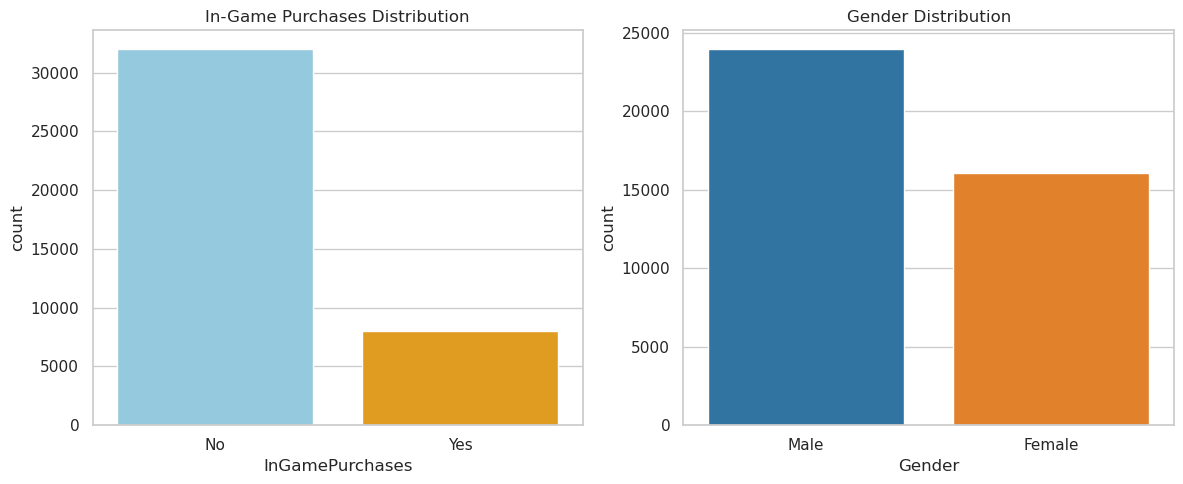

In [15]:
fig1, axs1 = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='InGamePurchases', palette=ingame_palette, order=['No', 'Yes'], ax=axs1[0])
axs1[0].set_title('In-Game Purchases Distribution')

sns.countplot(data=df, x='Gender', palette=gender_palette, ax=axs1[1])
axs1[1].set_title('Gender Distribution')

plt.tight_layout()
plt.show()





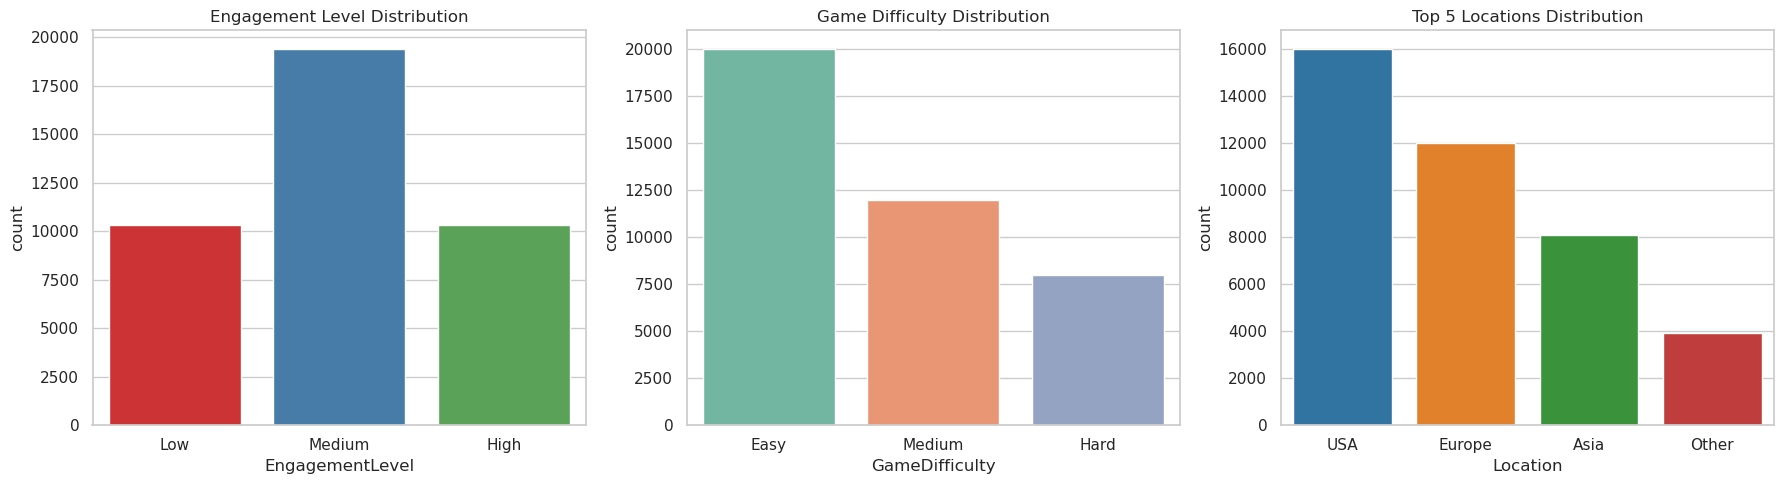

In [16]:
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 5))

sns.countplot(data=df, x='EngagementLevel', palette=engagement_palette, order=engagement_order, ax=axs2[0])
axs2[0].set_title('Engagement Level Distribution')

sns.countplot(data=df, x='GameDifficulty', palette=difficulty_palette, order=difficulty_order, ax=axs2[1])
axs2[1].set_title('Game Difficulty Distribution')

top_locations = df['Location'].value_counts().index[:5]
sns.countplot(data=df[df['Location'].isin(top_locations)], x='Location', palette=location_palette, order=top_locations, ax=axs2[2])
axs2[2].set_title('Top 5 Locations Distribution')

plt.tight_layout()
plt.show()





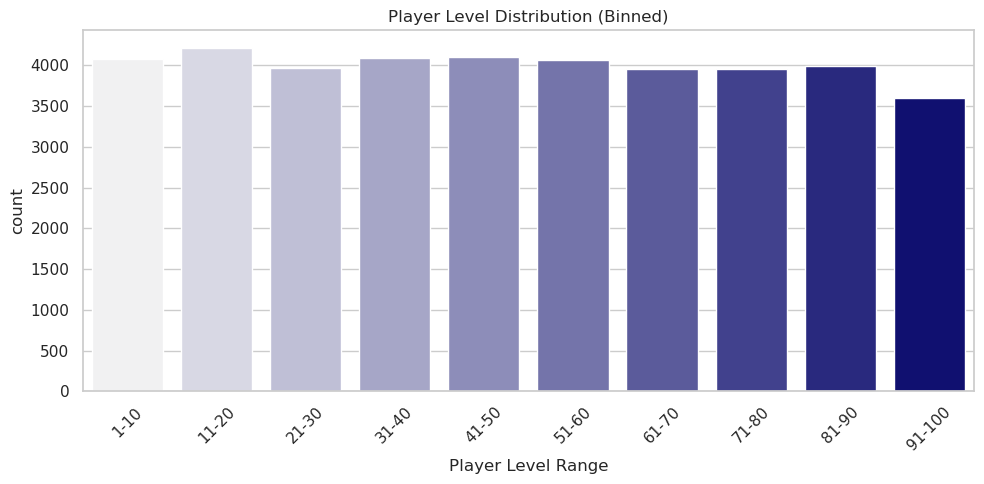

In [17]:
fig3, ax3 = plt.subplots(figsize=(10, 5))
playerlevel_colors = sns.light_palette("navy", n_colors=len(labels), reverse=False)
sns.countplot(data=df, x='PlayerLevelBin', order=labels, palette=playerlevel_colors, ax=ax3)
ax3.set_title('Player Level Distribution (Binned)')
ax3.set_xlabel('Player Level Range')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


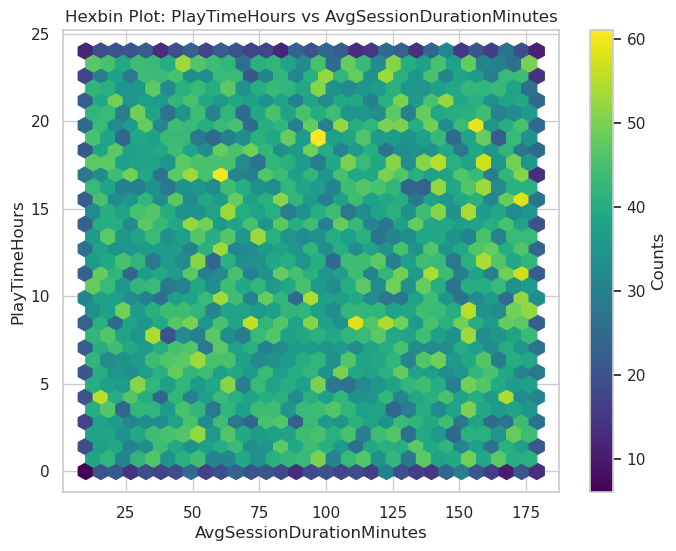

In [20]:
plt.figure(figsize=(8, 6))
plt.hexbin(df["AvgSessionDurationMinutes"], df["PlayTimeHours"], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Counts')
plt.xlabel("AvgSessionDurationMinutes")
plt.ylabel("PlayTimeHours")
plt.title("Hexbin Plot: PlayTimeHours vs AvgSessionDurationMinutes")
plt.grid(True)
plt.show()


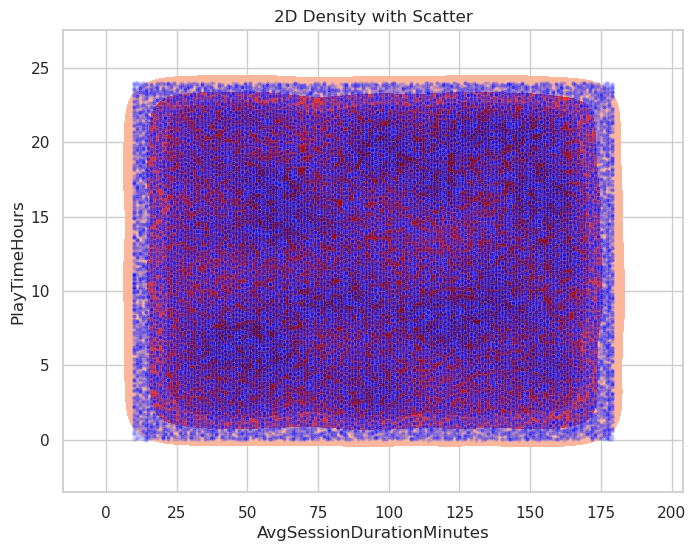

In [21]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    x=df["AvgSessionDurationMinutes"],
    y=df["PlayTimeHours"],
    cmap="Reds",
    fill=True,
    thresh=0.05
)
sns.scatterplot(
    x=df["AvgSessionDurationMinutes"],
    y=df["PlayTimeHours"],
    color='blue',
    alpha=0.2,
    s=10
)
plt.title("2D Density with Scatter")
plt.xlabel("AvgSessionDurationMinutes")
plt.ylabel("PlayTimeHours")
plt.grid(True)
plt.show()


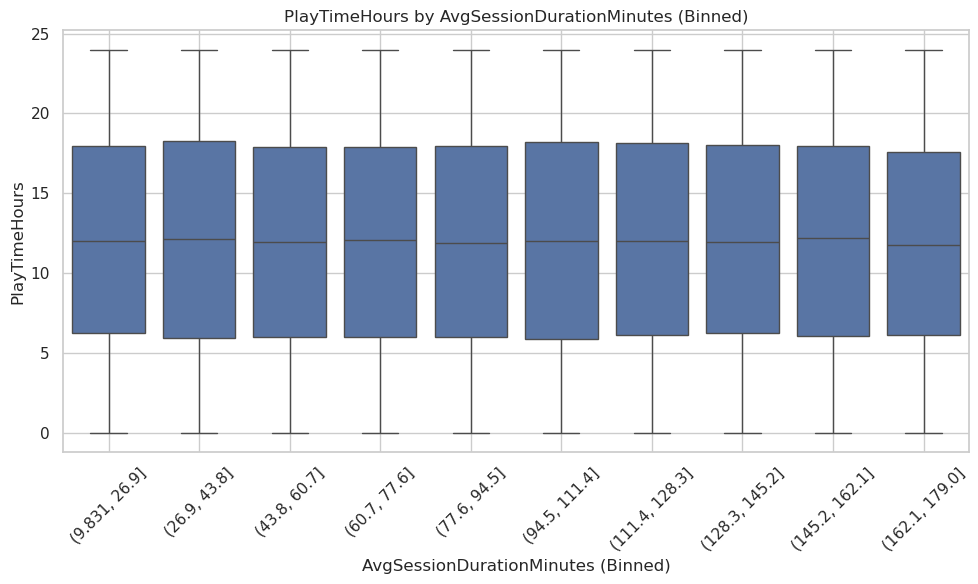

In [22]:
# Create duration bins
df['DurationBin'] = pd.cut(df['AvgSessionDurationMinutes'], bins=10)

plt.figure(figsize=(10, 6))
sns.boxplot(x='DurationBin', y='PlayTimeHours', data=df)
plt.xticks(rotation=45)
plt.title("PlayTimeHours by AvgSessionDurationMinutes (Binned)")
plt.xlabel("AvgSessionDurationMinutes (Binned)")
plt.ylabel("PlayTimeHours")
plt.grid(True)
plt.tight_layout()
plt.show()


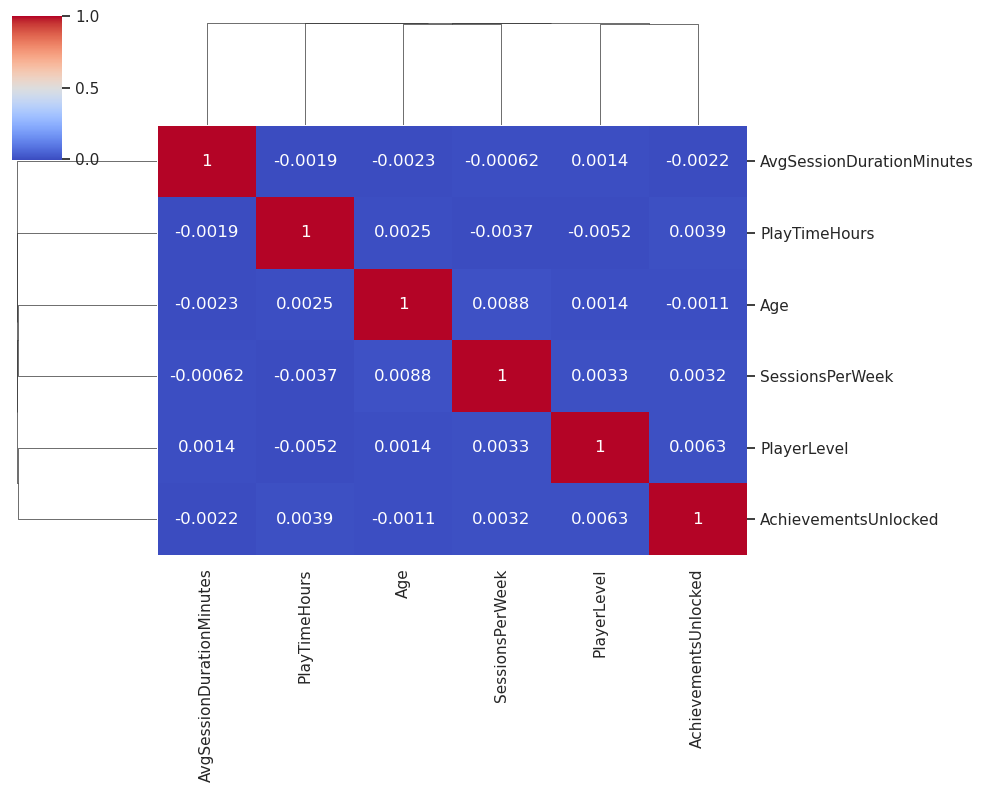

In [28]:
sns.clustermap(corr, annot=True, cmap='coolwarm', figsize=(10, 8))


In [29]:
# Basic correlation table
correlation_table = df[num_cols].corr()
print(correlation_table)


                                Age  PlayTimeHours  SessionsPerWeek  \
Age                        1.000000       0.002462         0.008777   
PlayTimeHours              0.002462       1.000000        -0.003655   
SessionsPerWeek            0.008777      -0.003655         1.000000   
AvgSessionDurationMinutes -0.002269      -0.001925        -0.000620   
PlayerLevel                0.001353      -0.005152         0.003257   
AchievementsUnlocked      -0.001100       0.003913         0.003187   

                           AvgSessionDurationMinutes  PlayerLevel  \
Age                                        -0.002269     0.001353   
PlayTimeHours                              -0.001925    -0.005152   
SessionsPerWeek                            -0.000620     0.003257   
AvgSessionDurationMinutes                   1.000000     0.001368   
PlayerLevel                                 0.001368     1.000000   
AchievementsUnlocked                       -0.002227     0.006343   

                  

## 📊 Correlation Analysis Report

This report analyzes the relationships between key numerical variables in the dataset using Pearson correlation coefficients.

### 🔢 Variables Included
- `Age`
- `PlayTimeHours`
- `SessionsPerWeek`
- `AvgSessionDurationMinutes`
- `PlayerLevel`
- `AchievementsUnlocked`

---

### 🧮 Correlation Matrix Summary

| Variable 1                | Variable 2                | Correlation |
|--------------------------|---------------------------|-------------|
| Age                      | PlayTimeHours             | +0.0025     |
| Age                      | SessionsPerWeek           | +0.0088     |
| Age                      | AvgSessionDurationMinutes | -0.0023     |
| Age                      | PlayerLevel               | +0.0014     |
| Age                      | AchievementsUnlocked      | -0.0011     |
| PlayTimeHours            | SessionsPerWeek           | -0.0037     |
| PlayTimeHours            | AvgSessionDurationMinutes | -0.0019     |
| PlayTimeHours            | PlayerLevel               | -0.0052     |
| PlayTimeHours            | AchievementsUnlocked      | +0.0039     |
| SessionsPerWeek          | AvgSessionDurationMinutes | -0.0006     |
| SessionsPerWeek          | PlayerLevel               | +0.0033     |
| SessionsPerWeek          | AchievementsUnlocked      | +0.0032     |
| AvgSessionDurationMinutes| PlayerLevel               | +0.0014     |
| AvgSessionDurationMinutes| AchievementsUnlocked      | -0.0022     |
| PlayerLevel              | AchievementsUnlocked      | +0.0063     |

---

### 📌 Key Takeaways

- All correlation values are **very close to zero**, indicating **no strong linear relationships** between the selected variables.
- The **highest observed correlation** was between `PlayerLevel` and `AchievementsUnlocked` (+0.0063), which is still negligible.
- These results suggest that the variables are largely **independent** of each other in terms of linear correlation.

> Next Steps: non-linear modeling or explore interactions if aiming to build predictive models.
